In [1]:
import random
import networkx as nx
import torch

from deep_ebm.utils_ebm import show_graph, evaluate_model
from deep_ebm.utils_ebm import save_graph, compare_graphs, show_graph_grid, compare_statistics
from deep_ebm.gnn_ebm import GraphDataset, GNN_EBM, train_one_epoch_pcd, gibbs_ministeps

from Plots_and_utils.plots import *
import pickle as pkl

device = torch.device("cpu")

---

In [3]:
with open("data/Tree30_dataset/Tree30_GraphDataset.pkl", "rb") as f:
    dataset_tree30  = pkl.load(f)

with open("Saved_models/tree30_GNN_EBM_30epochs.pkl", "rb") as f:
    model_tree30 = pkl.load(f)

In [8]:
metrics10 = evaluate_model(model_tree30, dataset_tree30, device, num_graphs=1000, gibbs_steps=10)
metrics100 = evaluate_model(model_tree30, dataset_tree30, device, num_graphs=1000, gibbs_steps=100)
metrics500 = evaluate_model(model_tree30, dataset_tree30, device, num_graphs=1000, gibbs_steps=500)
metrics1000 = evaluate_model(model_tree30, dataset_tree30, device, num_graphs=1000, gibbs_steps=1000)


In [9]:
print("Metrics after 10 Gibbs steps:", metrics10)
print("Metrics after 100 Gibbs steps:", metrics100)
print("Metrics after 500 Gibbs steps:", metrics500)
print("Metrics after 1000 Gibbs steps:", metrics1000)

Metrics after 10 Gibbs steps: {'degree_mmd': 0.10104616633463678, 'clustering_mmd': 0.03482793060220524}
Metrics after 100 Gibbs steps: {'degree_mmd': 0.1716535003748709, 'clustering_mmd': 0.4148861547630329}
Metrics after 500 Gibbs steps: {'degree_mmd': 0.1574020181436192, 'clustering_mmd': 0.86248286771959}
Metrics after 1000 Gibbs steps: {'degree_mmd': 0.15596756621680874, 'clustering_mmd': 1.0126684120115401}


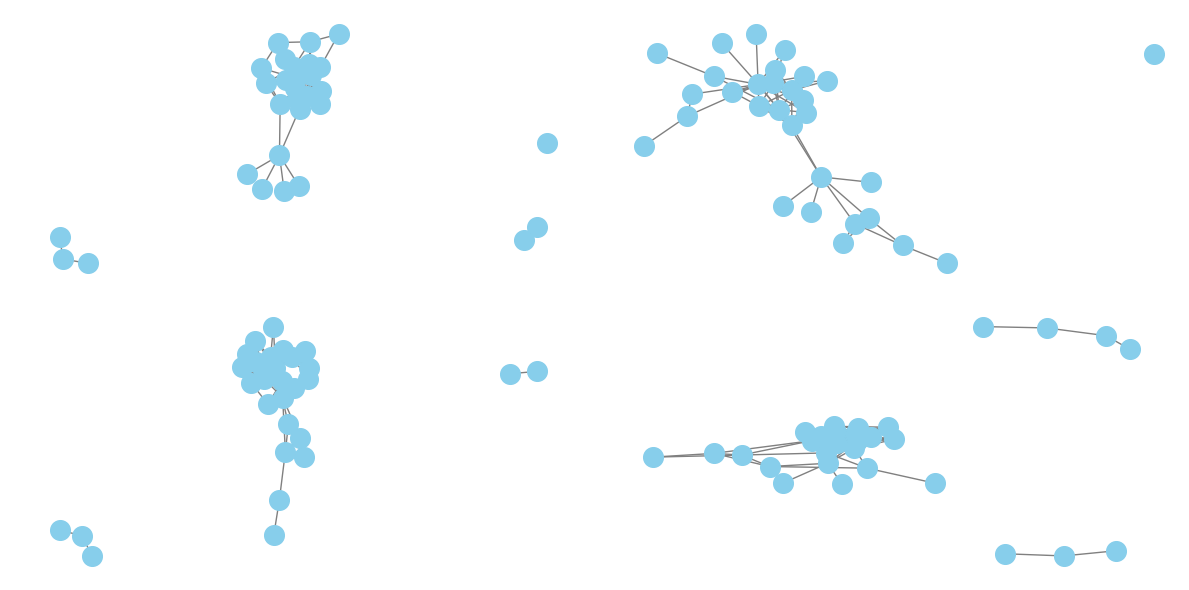

=== Graph Statistics Comparison ===
Real graphs: 200 graphs
  Avg nodes:      30.00
  Avg edges:      29.00
  Avg degree:     1.93
  Avg clustering: 0.000
Generated graphs: 4 graphs
  Avg nodes:      30.00
  Avg edges:      66.75
  Avg degree:     4.45
  Avg clustering: 0.270


({'num_graphs': 200,
  'avg_nodes': np.float64(30.0),
  'avg_edges': np.float64(29.0),
  'avg_degree': np.float64(1.9333333333333331),
  'avg_clustering': np.float64(0.0),
  'avg_algebraic_connectivity': np.float64(0.030101996089564712)},
 {'num_graphs': 4,
  'avg_nodes': np.float64(30.0),
  'avg_edges': np.float64(66.75),
  'avg_degree': np.float64(4.449999999999999),
  'avg_clustering': np.float64(0.27044064595535183),
  'avg_algebraic_connectivity': np.float64(0.0)})

In [6]:
generated = []
with torch.no_grad():
    for i in range(4):
        A, feats = dataset_tree30[i]
        A_gen = gibbs_ministeps(A, model_tree30, feats.to(device), device, mini_steps=10000)
        G_gen = nx.from_numpy_array(A_gen.cpu().numpy())
        generated.append(G_gen) 

show_graph_grid(generated, rows=2, cols=2, layout="spring")

compare_statistics(dataset_tree30.graphs, generated)


In [5]:
c = 0
for g in generated:
    if not nx.is_connected(g):
        c += 1

print(f"Number of disconnected generated graphs: {c} over {len(generated)} generated graphs")

Number of disconnected generated graphs: 88 over 200 generated graphs
